In [1]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


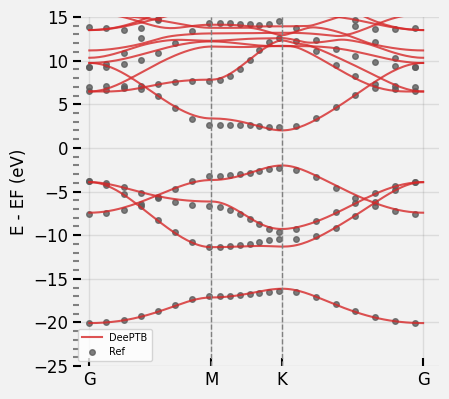

In [4]:

model = build_model(checkpoint="./ref_ckpts/condband/checkpoint/nnsk.ep500.pth")
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 3.6+5*0.3}

bcal = Band(model=model, 
            use_gui=False, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])

In [5]:
model.model_options

{'nnsk': {'onsite': {'method': 'none'},
  'hopping': {'method': 'powerlaw', 'rs': 1.6, 'w': 0.3},
  'soc': {},
  'freeze': False,
  'push': False,
  'std': 0.01}}

In [85]:
model.model_options 
aa = {
    'pbc':None
}

In [87]:
aa

{}

In [88]:
aa.pop("pbc",True)

True

In [48]:
import pyfiglet

# 创建 Figlet 对象并设置字体
f = pyfiglet.Figlet(font='standard')

# 将普通文本转换为艺术字并打印
text = "DeePTB"
print(f.renderText(text))

 ____            ____ _____ ____  
|  _ \  ___  ___|  _ \_   _| __ ) 
| | | |/ _ \/ _ \ |_) || | |  _ \ 
| |_| |  __/  __/  __/ | | | |_) |
|____/ \___|\___|_|    |_| |____/ 
                                  



In [40]:
from pyfiglet import FigletFont
fonts_res = FigletFont().getFonts()
print(fonts_res)

['univers', 'small_poison', 'clb8x8', 'stellar', 'icl-1900', 'skateord', 'pod_____', 'funky_dr', 'grand_pr', 'sansi', 'script__', 'rot13', 'amc_razor2', 'tec_7000', 'britei', 'bulbhead', 'arrows', 'rally_sp', 'chiseled', 'rozzo', 'mnemonic', 'utopiab', 'isometric1', 'ansi_regular', 'delta_corps_priest_1', 'xttyb', 'speed', 'xchartri', 'runyc', 'tanja', 'gothic__', 'chunky', 'maxfour', 'sl_script', '5x8', 'knob', 'xsbook', 'twopoint', 'sub-zero', 'demo_2__', 'char1___', 'advenger', 'ebbs_2__', 'test1', 'xhelvbi', 'serifcap', 'isometric2', 'larry3d', 'amc_neko', 'c_ascii_', 'radical_', 'helvb', 'fbr12___', 'sblood', 'train', 'js_bracket_letters', 'jazmine', 'graffiti', 'rally_s2', 'glenyn', 'coil_cop', 'rev', 'dcs_bfmo', 'big_money-sw', 'clr5x6', 'smslant', 'a_zooloo', 'eftiwater', 'space_op', 'the_edge', 'asslt__m', 'triad_st', 'timesofl', 'basic', 'e__fist_', 'fireing_', 'clr8x8', 'dotmatrix', 'star_strips', 'f15_____', 'amc_3_liv1', 'cybermedium', 'pawn_ins', 'nancyj-underlined', 'ras

In [52]:
import pyfiglet
#fonts = ['univers', 'small_poison', 'clb8x8', 'stellar', 'icl-1900', 'skateord', 'pod_____', 'funky_dr', 'grand_pr', 'sansi', 'script__', 'rot13', 'amc_razor2', 'tec_7000', 'britei', 'bulbhead', 'arrows', 'rally_sp', 'chiseled', 'rozzo', 'mnemonic', 'utopiab', 'isometric1', 'ansi_regular', 'delta_corps_priest_1', 'xttyb', 'speed', 'xchartri', 'runyc', 'tanja', 'gothic__', 'chunky', 'maxfour', 'sl_script', '5x8', 'knob', 'xsbook', 'twopoint', 'sub-zero', 'demo_2__', 'char1___', 'advenger', 'ebbs_2__', 'test1', 'xhelvbi', 'serifcap', 'isometric2', 'larry3d', 'amc_neko', 'c_ascii_', 'radical_', 'helvb', 'fbr12___', 'sblood', 'train', 'js_bracket_letters', 'jazmine', 'graffiti', 'rally_s2', 'glenyn', 'coil_cop', 'rev', 'dcs_bfmo', 'big_money-sw', 'clr5x6', 'smslant', 'a_zooloo', 'eftiwater', 'space_op', 'the_edge', 'asslt__m', 'triad_st', 'timesofl', 'basic', 'e__fist_', 'fireing_', 'clr8x8', 'dotmatrix', 'star_strips', 'f15_____', 'amc_3_liv1', 'cybermedium', 'pawn_ins', 'nancyj-underlined', 'rastan__', 'lean', 'tecrvs__', 'future_3', 'pepper', 'taxi____', 'skate_ro', 'danc4', 'nfi1____', 'lockergnome', 'elite', 'ogre', 'bigfig', 'benjamin', 'cola', 'bloody', 'ttyb', 'charact3', 'big_money-nw', 'keyboard', 'heart_right', 'rainbow_', 'britebi', 'banner3-D', 'sbooki', 'demo_1__', 'amc_3_line', 'mad_nurs', 'platoon_', 'binary', 'invita', 'hades___', 'smshadow', 'crawford2', 'tsn_base', 'top_duck', 'rammstein', 'cosmike', 'bubble', 'road_rai', 'sbookbi', 'notie_ca', 'heavy_me', 'z-pilot_', 't__of_ap', 'horizontal_right', 'clr6x6', 'relief2', 'asc_____', 'krak_out', 'fair_mea', 'fp2_____', 'thin', 'flower_power', 'this', 'deep_str', 'old_banner', 'eca_____', 'master_o', 'stop', 'ebbs_1__', 'morse2', 'ansi_shadow', 'sweet', 'bubble_b', 'impossible', 'sm______', 'platoon2', 'epic', 'xhelvi', 'star_war', 'courbi', 'future_6', 'rampage_', '6x10', 'future_8', 'small_caps', '1943____', 'big_money-ne', 'js_cursive', 'times', 'flipped', 'courb', 'alligator2', '1row', 'hills___', 'finalass', 'line_blocks', 'hyper___', 'linux', 'hex', 'slscript', 'red_phoenix', 'subteran', 'couri', 'ghost', 'gauntlet', 'short', 'poison', 'smisome1', 'konto', 'xcouri', 'morse', 'fender', 'dos_rebel', 'double', 'cyberlarge', 'home_pak', 'octal', 'kban', 'hieroglyphs', 'contessa', 'clr7x10', 'banner', 'katakana', 'letterw3', 'wavy', 'fp1_____', 'bell', 'nvscript', 'zone7___', 'com_sen_', 'stacey', 'letters', 'fun_face', 'eftifont', 'fbr1____', 'magic_ma', 'marquee', 'lil_devil', 'ghoulish', 'amc_thin', 'isometric4', 'letter_w', 'shadow', 'fuzzy', 'nipples', 'eftipiti', 'outrun__', 'block', 'street_s', 'chartri', 'd_dragon', 'sbookb', 'spc_demo', 'gothic', 'rci_____', 'os2', 'jacky', 'xcourb', 'crawford', 'cybersmall', 'demo_m__', 'threepoint', 'war_of_w', 'banner3', 'tengwar', 'new_asci', 'xcourbi', 'eftichess', 'caligraphy', 'tomahawk', 'slant', 'xsansbi', 'merlin2', 'briteb', 'b_m__200', 'stick_letters', 'clr6x10', 'dancing_font', 'soft', 'acrobatic', 'wet_letter', 'fbr_stri', 'banner4', 'yie-ar__', 'ntgreek', 'patorjk-hex', 'future_1', 'amc_tubes', 'puzzle', 'bear', 'small_slant', 'calvin_s', 'trek', 'atc_____', 'super_te', 'panther_', 'italic', 'ascii___', 'colossal', 'pacos_pe', 'xchartr', 'future_5', 'fantasy_', 'fbr_tilt', 'tiles', 'rad_phan', 'tav1____', 'flyn_sh', 'tsalagi', 'ripper!_', 'small', 'puffy', 'xsbookbi', 'stronger_than_all', 'brite', 'kik_star', 'battlesh', 'aquaplan', 'rowancap', 'ts1_____', 'type_set', '4max', 'horizontal_left', 'eftiwall', 'odel_lak', 'def_leppard', 'stforek', 'bigchief', 'fun_faces', 'swan', 'xhelvb', 'vortron_', 'house_of', 'xcour', 'sansb', 'calgphy2', 'cursive', 'lcd', 'mike', 'roman', 'charact5', 'xbritebi', 'catwalk', 'assalt_m', 'hypa_bal', 'broadway', 'char3___', 'chartr', 'beer_pub', 'battle_s', 'small_shadow', 'smkeyboard', 'filter', 'convoy__', 'runic', 'thick', 'merlin1', 'crazy', 'future_2', 'rotated', 'high_noo', 'electronic', 'heart_left', 'helv', 'fbr2____', 'phonix__', 'pebbles', 'xsansi', 'pawp', 'amc_slash', 'unarmed_', 'jerusalem', 'spliff', 'slant_relief', 'italics_', 'xhelv', 'relief', "patorjk's_cheese", 'tubular', 'cli8x8', 'fourtops', '3d-ascii', 'alligator', 'xtty', 'char4___', 'santa_clara', 'xbriteb', 'green_be', '64f1____', '4x4_offr', 'lazy_jon', 'weird', 'inc_raw_', 'amc_slider', 'amc_aaa01', 'doh', 'avatar', 'b1ff', 'caus_in_', 'mirror', 'yie_ar_k', 'contrast', 'fire_font-s', 'clr5x8', 'usa_____', 'hollywood', 'c1______', '6x9', 'tsm_____', 'rok_____', 'defleppard', 'atc_gran', 'shimrod', 'fairligh', 'decimal', 'computer', 'heroboti', 'joust___', 'alphabet', '5x7', '3d_diagonal', 'goofy', 'xbrite', 'clb6x10', 'eftirobot', 'nscript', 'js_block_letters', 'cricket', 'r2-d2___', 'sketch_s', 'stencil2', 'ghost_bo', 'georgi16', 'konto_slant', 'rounded', 'digital', 'xsansb', 'drpepper', 'c2______', 'helvi', 'varsity', 'xsbooki', 'xtimes', 'utopiabi', 'rad_____', 'eftitalic', 'straight', 'npn_____', 'mayhem_d', 'double_shorts', 'sbook', 'barbwire', 'stealth_', 'efti_robot', 'trashman', 'diamond', 'charact4', 'clr4x6', 'stampatello', 'ticks', 'js_stick_letters', 'future_4', 'ok_beer_', 'xbritei', 'big', 'future_7', 'cards', 'fraktur', 'usaflag', 'greek', 'peaks', 'graceful', 'etcrvs__', 'mig_ally', 'modern__', 'ugalympi', 'clr8x10', 'rectangles', 'cygnet', 'broadway_kb', 'henry_3d', 'cosmic', 'cour', 'term', 'clr5x10', 'whimsy', 'big_money-se', 'script', 'p_s_h_m_', 'bright', 'stencil1', 'charact1', 'clb8x10', 'swamp_land', 'dwhistled', '3-d', 'standard', 'raw_recu', 'ivrit', 'bubble__', 'nancyj', 'madrid', 'usa_pq__', 'nancyj-improved', 'faces_of', 'utopiai', 'characte', 'mini', 'wow', 'smtengwar', 'bolger', 'twisted', 'js_capital_curves', 'charact6', 'tinker-toy', 'coinstak', 'sansbi', 'tty', 'amc_untitled', 'char2___', 'xsans', 'ucf_fan_', 'skateroc', '3x5', 'nancyj-fancy', 'roman___', 'tec1____', 'clr7x8', 'devilish', 'alpha', 'mshebrew210', 'pyramid', 'stampate', 'gradient', 'p_skateb', 'fire_font-k', 'charset_', 'starwars', 'braced', 'ticksslant', 'georgia11', 'mcg_____', 'baz__bil', 'moscow', 'diet_cola', 'tombstone', 'kgames_i', 'clr6x8', 'lexible_', 'smscript', 'helvbi', 'muzzle', 'druid___', 'c_consen', 'doom', 'charact2', 'isometric3', 'xsbookb', 'zig_zag_', '5lineoblique', 'rockbox_', 'slide', 'ti_pan__', 'ascii_new_roman', 'twin_cob', 'utopia', 'blocky', 'modular', 'blocks', 'thorned', 'sans', 'o8', 'amc_razor']

def display_deeptb_fonts():
    fonts = ['dos_rebel', 'electronic', 'varsity', 'blocky', 'standard', 'doom', 'roman', 'colossal']
    text = "DeePTB"
    
    for font in fonts:
        print(f"\nFont: {font}")
        f = pyfiglet.Figlet(font=font)
        print(f.renderText(text))
        print("-" * 50)

# 显示所有字体
display_deeptb_fonts()


Font: dos_rebel
 ██████████                     ███████████  ███████████ ███████████ 
░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███
 ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███
 ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████ 
 ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███
 ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███
 ██████████  ░░██████ ░░██████  █████           █████    ███████████ 
░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░  
                                                                     
                                                                     
                                                                     

--------------------------------------------------

Font: electronic
 ▄▄▄▄▄▄▄▄▄▄   ▄▄▄▄▄▄▄▄▄▄▄  ▄▄▄▄▄▄▄▄▄▄▄  ▄▄▄▄▄▄▄▄▄▄▄  ▄▄▄▄▄▄▄▄▄▄▄  ▄▄▄▄▄▄▄▄▄▄  
▐░░░░░░░░░░▌ ▐░░░░░░░░░░░▌▐░░░░░░░░░░░▌▐░░░░░░░░░░░▌▐░░░░░░░░░░░

In [61]:
padding=2
nnn = 78-padding
format_str = "#" + "{}"+"{:<"+f"{nnn}" + "}"+ "#"      

In [64]:
len("##################################################################")

66